## Read and prepare the circle points data

In [21]:
import pandas as pd
# reading the data
data= pd.read_csv("Geom.csv")
# quick preview
data.head()

,,.1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 112,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121
0,82,0,81.55081,8.571335,80.20810,17.04875,77.98663,25.33940,74.91074,33.35240,...,74.91058,-33.35272,77.98654,-25.33972,80.20804,-17.04910,81.55075,-8.571701,82,-0.000381
1,82,0,81.55078,8.571320,80.20813,17.04877,77.98663,25.33939,74.91071,33.35242,...,74.91058,-33.35272,77.98651,-25.33972,80.20801,-17.04910,81.55078,-8.571686,82,-0.000366
2,129,0,128.29330,13.484180,126.18100,26.82060,122.68630,39.86319,117.84740,52.46902,...,117.84720,-52.46951,122.68610,-39.86371,126.18090,-26.82115,128.29330,-13.484740,129,-0.000595
3,108,0,107.40840,11.289080,105.64000,22.45447,102.71410,33.37384,98.66290,43.92755,...,98.66272,-43.92796,102.71400,-33.37427,105.63980,-22.45493,107.40830,-11.289550,108,-0.000504
4,145,0,144.20570,15.156620,141.83140,30.14719,137.90320,44.80746,132.46410,58.97681,...,132.46390,-58.97736,137.90300,-44.80804,141.83130,-30.14783,144.20560,-15.157260,145,-0.000671


In [22]:
print(data.shape)
# creating fake labels as i am too lazy to make a function to split the data myself
data[" .1"]

(22, 122)


0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
Name:  .1, dtype: int64

In [23]:
import numpy as np
from sklearn.model_selection import train_test_split
npData = data.to_numpy()
# fake labels (all zeros) converted to numpy so i can use train_test_split
fakeLabels = data[" .1"].to_numpy()

# Split the circle samples into training data (17 samples) and testing data (5 samples) (80% of data will be 17.6 wich will be 17 😊 )
# fixed random state to keep the output from changing every run
# and we dont need anything other than X_train and X_test soo _,_ 😉
X_train, X_test,_,_= train_test_split(npData, fakeLabels, test_size=0.2, random_state=42)


In [24]:
# just to be sure 👀
print(X_test.shape)
print(X_train.shape)

(5, 122)
(17, 122)


### Here we will create 3 models:
#### 1. Autoencoder model (this is the full model)
#### 2. Encoder model (this is the encoding part (from input layer till the encoded layer))
#### 3. Decoder model (this is the decoding part (from encoded layer till the output layer)) however we cant create a model without an input layer so we create an input layer and then pass it to the first layer after the encoded layer

In [25]:
import tensorflow as tf
import keras
from keras import layers , losses

# This is the size of our encoded representations
encoding_dim = 30 # 60 had slightly better loss / MSE

# This is our input
input = keras.Input(shape=(122,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation=tf.keras.layers.LeakyReLU(alpha=0.45))(input)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(122, activation=tf.keras.layers.LeakyReLU(alpha=0.35))(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input, decoded)

# This model maps an input to its encoded representation
encoder = keras.Model(input, encoded)

# This is our encoded (encoding-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1](encoded_input)
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer)

autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [26]:
from sklearn.metrics import mean_squared_error
autoencoder.fit(X_train, X_train,
                epochs=150,
                batch_size=128,
                    validation_data=(X_test, X_test))

Epoch 1/150
1/1 [==============================] - 0s 306ms/step - loss: 8385.5742 - val_loss: 5570.3833
Epoch 2/150
1/1 [==============================] - 0s 24ms/step - loss: 7798.4429 - val_loss: 5196.9546
Epoch 3/150
1/1 [==============================] - 0s 24ms/step - loss: 7275.6758 - val_loss: 4867.0493
Epoch 4/150
1/1 [==============================] - 0s 24ms/step - loss: 6813.8359 - val_loss: 4574.8628
Epoch 5/150
1/1 [==============================] - 0s 24ms/step - loss: 6404.7964 - val_loss: 4329.0742
Epoch 6/150
1/1 [==============================] - 0s 25ms/step - loss: 6060.7119 - val_loss: 4113.3037
Epoch 7/150
1/1 [==============================] - 0s 26ms/step - loss: 5758.6499 - val_loss: 3925.6968
Epoch 8/150
1/1 [==============================] - 0s 25ms/step - loss: 5496.0132 - val_loss: 3769.2222
Epoch 9/150
1/1 [==============================] - 0s 25ms/step - loss: 5276.9521 - val_loss: 3636.1355
Epoch 10/150
1/1 [==============================] - 0s 24ms/ste

In [27]:
# using the encoder / decoder

encoded = encoder.predict(X_test)
decoded = decoder.predict(encoded)

print("MSE of the whole model is {}".format(mean_squared_error(X_test,decoded)))


# sigmoid + linear + sgd = 1363.7275
# sigmoid + PReLU + sgd = 710.3528
# softsign + linear + sgd = 609.2876 best shape
# softsign + PReLU + sgd = 433.9979 best loss
# tf.keras.layers.LeakyReLU(alpha=0.3) + tf.keras.layers.LeakyReLU(alpha=0.3) +adam = 0.007178465960175155  dim = 30😮
# tf.keras.layers.LeakyReLU(alpha=0.35) + tf.keras.layers.LeakyReLU(alpha=0.45) +adam = 0.0012699288707520454  dim = 60😮

MSE of the whole model is 0.015239851706151563


In [28]:
print(X_test.shape)
print(encoded.shape)
print(decoded.shape)

(5, 122)
(5, 30)
(5, 122)


In [29]:
# was trying to get the no of rows in x_test
X_test.shape[0]

5

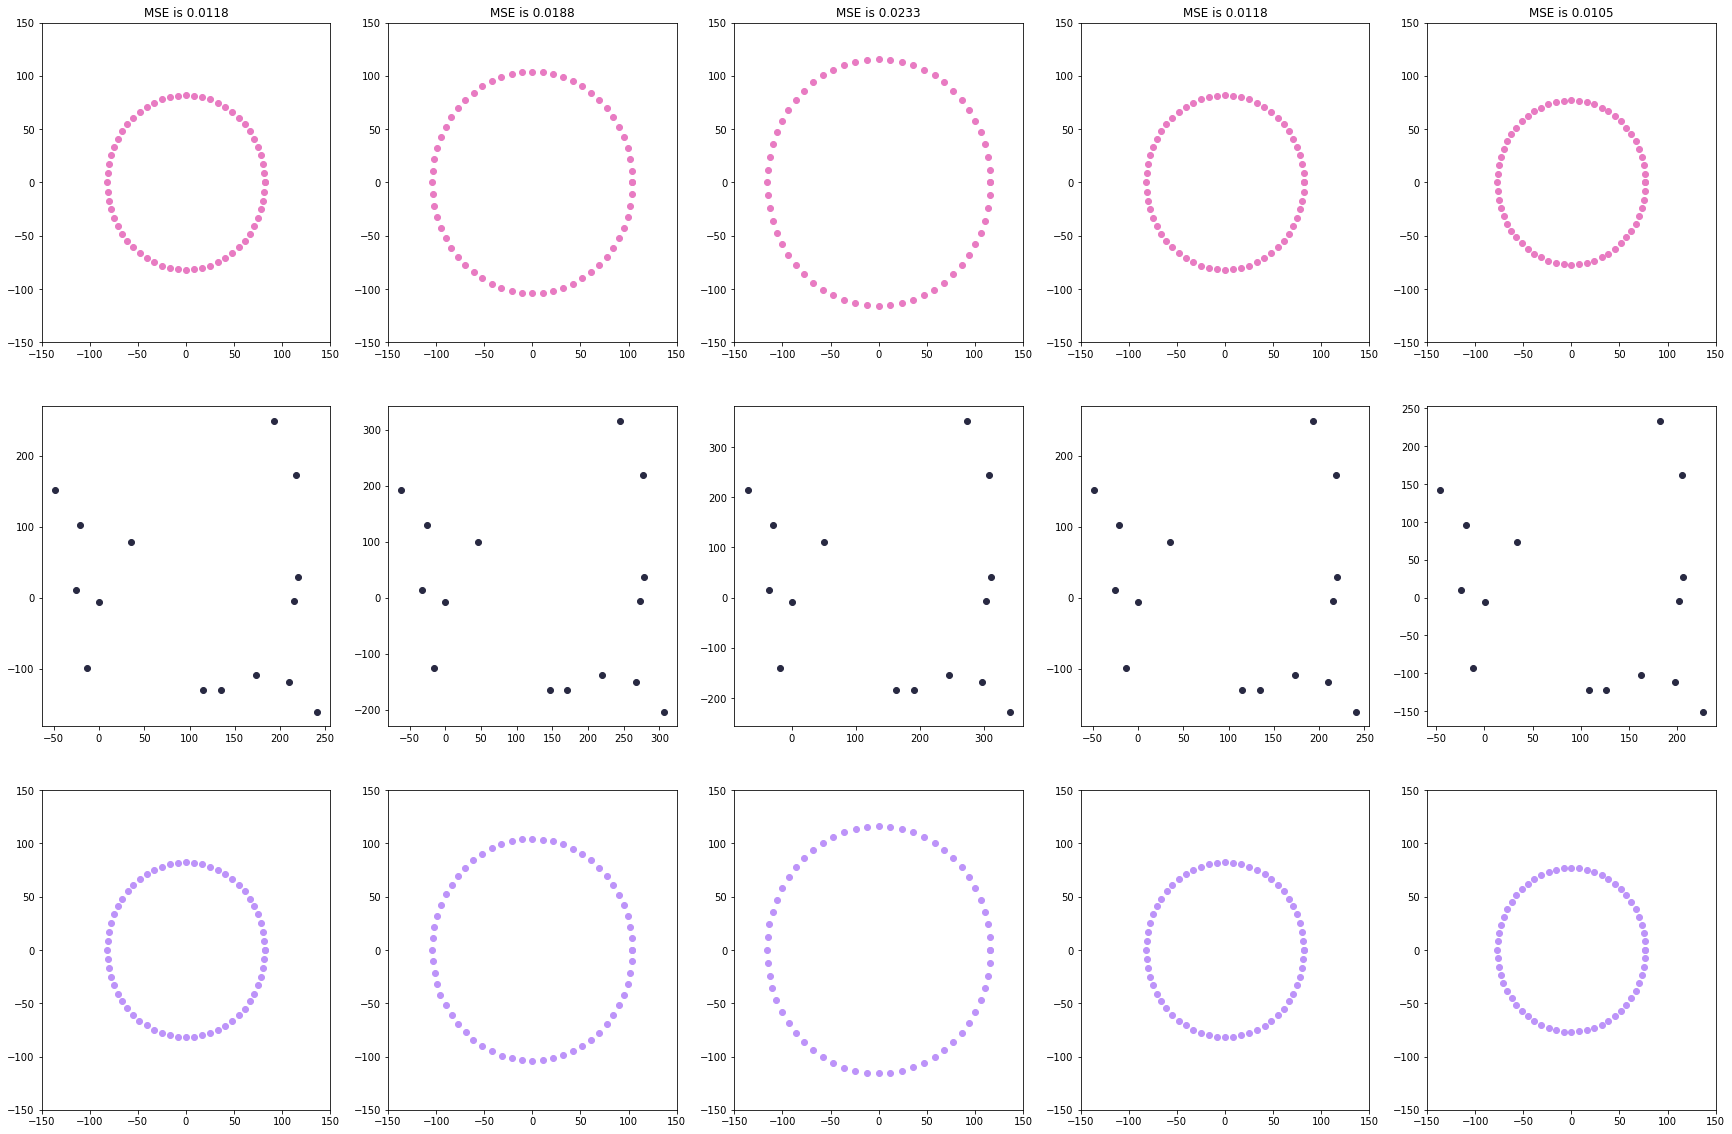

In [31]:
import matplotlib.pyplot as plt


n_rows = X_test.shape[0]
plt.figure(figsize=(30, 20))
for i in range(n_rows):
    x = X_test[i][::2] # To access the even (X's)
    y = X_test[i][1::2] # To access the odds (Y's)

    # original data
    ax = plt.subplot(3, n_rows, i + 1)
    plt.xlim(-150,150)
    plt.ylim(-150,150)
    plt.title("MSE is {}".format(round(mean_squared_error(X_test[i],decoded[i]),4)))
    plt.scatter(x,y,color = "#e87bc2")
    

    x = encoded[i][::2] # To access the even (X's)
    y = encoded[i][1::2] # To access the odds (Y's)

    # encoded data
    ax = plt.subplot(3, n_rows, i + 1 + n_rows)
    # plt.xlim(-150,150)
    # plt.ylim(-150,150)
    plt.scatter(x,y,color = "#282942")
    

    x = decoded[i][::2] # To access the even (X's)
    y = decoded[i][1::2] # To access the odds (Y's)

    # decoded data
    ax = plt.subplot(3, n_rows, i + 1 + (2*n_rows))
    plt.xlim(-150,150)
    plt.ylim(-150,150)
    plt.scatter(x,y,color = "#bd93f9")
    
    # print("----------------------------------------")
    
plt.show()

